In [1]:
%matplotlib notebook
import importlib
import numpy
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import wi_parser

# Load device postions

WI stores device positions inside an sqlite file. This snippet shows how to load the positions of transmitters and receivers in particular TX or RX sets from the sqlite file.

This snippet will attempt to find the file `projectdir/studyarea/project.studyarea.sqlite`

In [2]:
# project and data parameters
project="lora multifreq rosslyn"
studyarea="simple walk"
projectdir="data"
txset = 3
txID = 2
rxset = 9

# get transmitter and reciever positions from SQL file
sqlfile = wi_parser.sqlfilename(project=project,
                         studyarea=studyarea,
                         projectdir=projectdir)
print("using SQL file:", sqlfile)

txpos = wi_parser.parsePos(sqlfile, devType="txset", setid=txset)
print("# of TX entries:", len(txpos))
rxpos = wi_parser.parsePos(sqlfile, devType="rxset", setid=rxset)
print("# of RX entries:", len(rxpos))

# find line of sight distances between sets of transmitters and receivers
distances = wi_parser.computeDistancesLOS(txpos, rxpos)
print("# of distance entries:", len(distances))

# find ideal time of arrival between tx and rx devices
toa = wi_parser.computeToaLOS(distances)
print("# of ToA entries:", len(toa))

using SQL file: data/simple walk/lora multifreq rosslyn.simple walk.sqlite
# of TX entries: 5
# of RX entries: 1849
# of distance entries: 9245
# of ToA entries: 9245


<IPython.core.display.Javascript object>


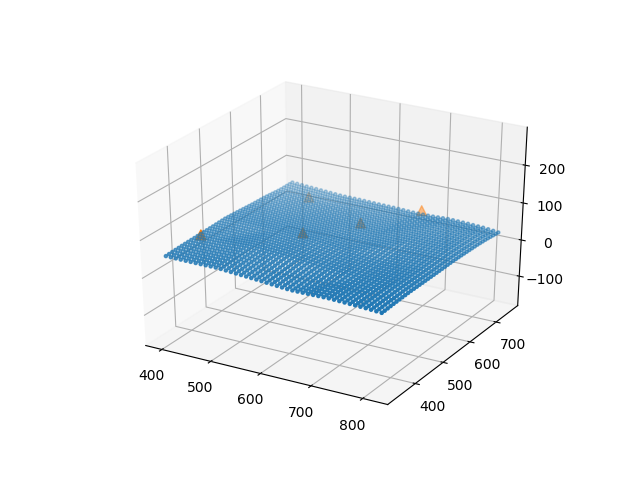

In [3]:
# plot all receivers from rx pos dictionary

# axis scaling helper function
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

# plot all devices in a dictionary
def plotPositions(ax, posDict, **plotargs):
    positions = np.zeros((len(posDict), 3))
    for index, (devid, pos) in enumerate(posDict.items()):
        positions[index] = pos
    ax.scatter(positions[:,0], positions[:,1], positions[:,2], **plotargs)


def plotTxRxPos(rxpos, txpos):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plotPositions(ax, rxpos, marker='.', color='C0')
    plotPositions(ax, txpos, marker='^', color='C1', s=50)
    set_axes_equal(ax)
    ax.grid()

plotTxRxPos(rxpos, txpos)

plt.show()

# Load CIR data

WI stores CIR dta in ASCII readable p2m files. This little snippet will load the CIR entry for a particular receiver as well as the CIR enty for all receivers.

This snippet will attempt to load the file `projectdir/studyarea/project.output.txID_txSet.rxSet.p2m`

In [8]:
# project and data parameters
project="lora multifreq rosslyn"
studyarea="simple walk"
projectdir="data"
txset = 3
txID = 2
rxset = 9
rxID = 20  # ID to use for single CIR loading

# find filename of p2m file
cirfile = wi_parser.outputfilename(project=project,
                                   studyarea=studyarea,
                                   output="cir",
                                   txset=txset,
                                   txn=txID, 
                                   rxset=rxset, 
                                   projectdir=projectdir)
print("using output file:", cirfile)

# parse a single CIR entry for a given receiver
cirDataOne = wi_parser.loadEntryCIR(cirfile, rxID)
print("{} paths found for rxID {}".format(len(cirDataOne), rxID))

# attempt to load all CIR entries
cir = wi_parser.loadAllCIR(cirfile, rxset, txset, txID)
# remove any entries which have zero paths
cir = {linkid:cirentry for linkid,cirentry in cir.items() if len(cirentry) > 0}
print("# of (non empty) CIR entries:", len(cir))

using output file: data/simple walk/lora multifreq rosslyn.cir.t002_03.r009.p2m
0 paths found for rxID 20
# of (non empty) CIR entries: 701


# Load delay spread data

WI stores delay apread data in ASCII readable p2m files. This little snippet will load the DS entries.

This snippet will attempt to load the file `projectdir/studyarea/project.output.txID_txSet.rxSet.p2m`

In [10]:
# parse delay spread and location

        
project="lora multifreq rosslyn"
studyarea="simple walk"
projectdir="data"
txset = 3
txid = 2
rxset = 9

dsfile = wi_parser.outputfilename(project=project,
                                   studyarea=studyarea,
                                   output="spread",
                                   txset=txset,
                                   txn=txID, 
                                   rxset=rxset, 
                                   projectdir=projectdir)
print("dsfile:", dsfile)

ds, rxpos2, distances2 = wi_parser.loadDelaySpread(dsfile, rxset, txset, txid)

dsfile: data/simple walk/lora multifreq rosslyn.spread.t002_03.r009.p2m
